In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data. feature_names)

In [9]:
df['Longitude'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,5.000010


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [20]:
# extract the features and target variable
X = df.drop('Longitude', axis=1).values
y = df['Longitude'].values

X  

array([[8.32520000e+00, 4.10000000e+01, 6.98412698e+00, ...,
        3.22000000e+02, 2.55555556e+00, 3.78800000e+01],
       [8.30140000e+00, 2.10000000e+01, 6.23813708e+00, ...,
        2.40100000e+03, 2.10984183e+00, 3.78600000e+01],
       [7.25740000e+00, 5.20000000e+01, 8.28813559e+00, ...,
        4.96000000e+02, 2.80225989e+00, 3.78500000e+01],
       ...,
       [1.70000000e+00, 1.70000000e+01, 5.20554273e+00, ...,
        1.00700000e+03, 2.32563510e+00, 3.94300000e+01],
       [1.86720000e+00, 1.80000000e+01, 5.32951289e+00, ...,
        7.41000000e+02, 2.12320917e+00, 3.94300000e+01],
       [2.38860000e+00, 1.60000000e+01, 5.25471698e+00, ...,
        1.38700000e+03, 2.61698113e+00, 3.93700000e+01]])

In [22]:
# split into training and test
from sklearn.model_selection import train_test_split
5.00001
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [32]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled.shape[1]

7

In [50]:
import tensorflow as tf


In [54]:
import tensorflow as tf
import keras

# build the model
model = keras.models.Sequential([
    keras.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'), #hidden layer 1
    keras.layers.Dense(32, activation='relu'), #hidden layer 2
    keras.layers.Dense(1) # output = median house value
])

# Compile the model. Optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# training set = 16000
# batch size = 32
# per epoch, we are going to calculate the loss of 16000/32 batches.

# Training Set: Used to train the model
# Validation Set: Measure the performance of the model on unseen data DURING training
# Test Set: Measure the performance of the model AFTER training
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8343 - mae: 0.9275 - val_loss: 0.5694 - val_mae: 0.5495
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5171 - mae: 0.5207 - val_loss: 0.4904 - val_mae: 0.5101
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4491 - mae: 0.4907 - val_loss: 0.5158 - val_mae: 0.5121
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4415 - mae: 0.4835 - val_loss: 0.4562 - val_mae: 0.4874
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4334 - mae: 0.4782 - val_loss: 0.4539 - val_mae: 0.4955


In [56]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

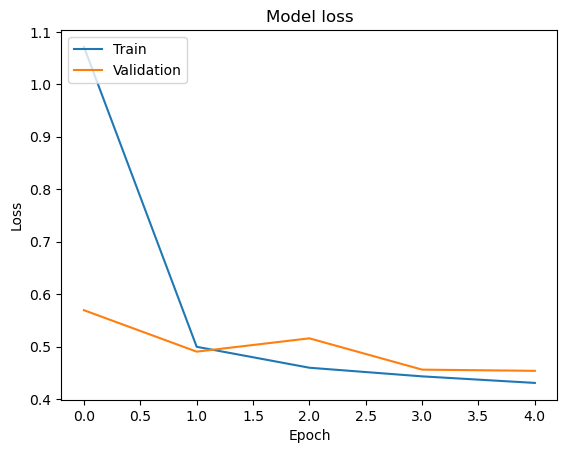

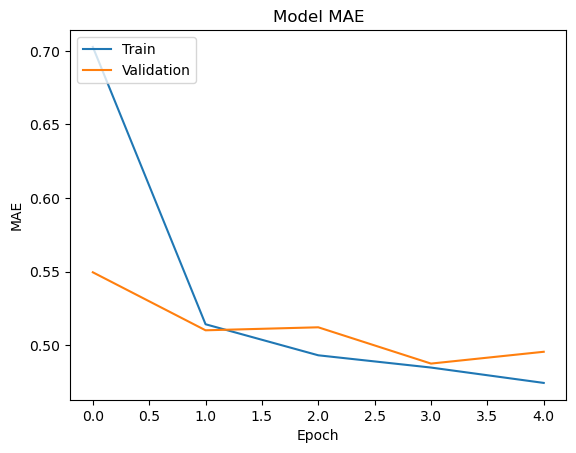

In [58]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [60]:
results = model.evaluate(X_test_scaled, y_test)
results

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4465 - mae: 0.4860


[0.4449930787086487, 0.48644453287124634]

In [62]:

predictions = model.predict(X_test_scaled)
predictions

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.8527445],
       [1.4747473],
       [4.059369 ],
       ...,
       [4.564618 ],
       [1.2837559],
       [1.5900189]], dtype=float32)